# AI PLANET
## AI/ML Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
train = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")


In [3]:
#previewing the data
train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
train.shape

(23097, 18)

In [5]:
train.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [6]:
train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [7]:
train.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

<AxesSubplot:>

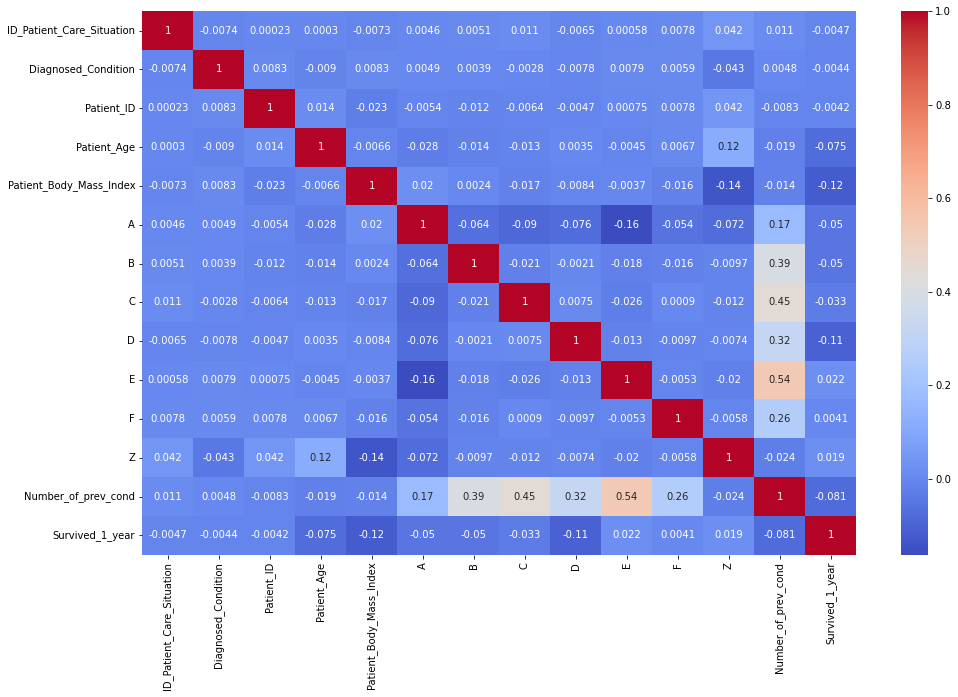

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True, cmap='coolwarm')

In [9]:
#previewing the target variable
train['Survived_1_year']

0        0
1        1
2        0
3        1
4        1
        ..
23092    0
23093    1
23094    0
23095    1
23096    0
Name: Survived_1_year, Length: 23097, dtype: int64

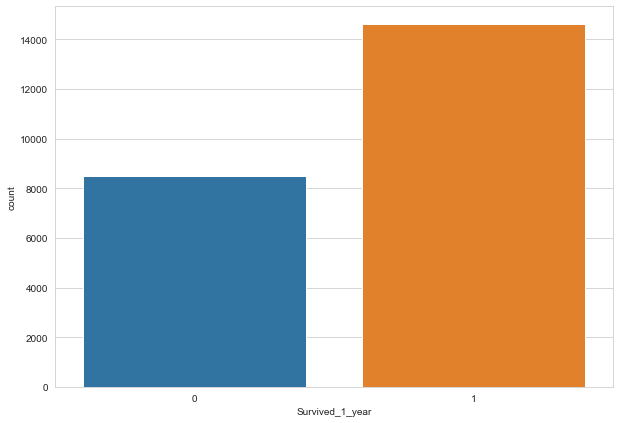

In [10]:
#distribution of target column
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived_1_year',data=train)
plt.show()

In [11]:
#number of those that survived and those that didnt
print('survived',train['Survived_1_year'][train['Survived_1_year']== 1].value_counts())
print('Did not survive',train['Survived_1_year'][train['Survived_1_year']== 0].value_counts())


survived 1    14603
Name: Survived_1_year, dtype: int64
Did not survive 0    8494
Name: Survived_1_year, dtype: int64


From the above data it can be concluded that most patients survived after one year

## DATA PREPARATION 

In [12]:
#missng values

train.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

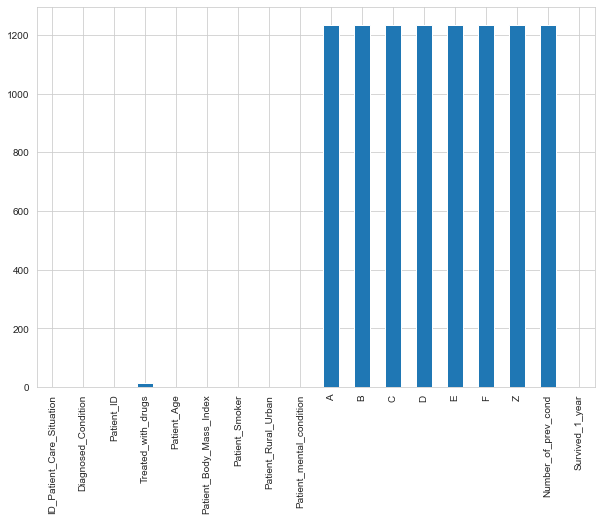

In [13]:
plt.figure(figsize=(10,7))
train.isna().sum().plot(kind='bar') 
plt.show()

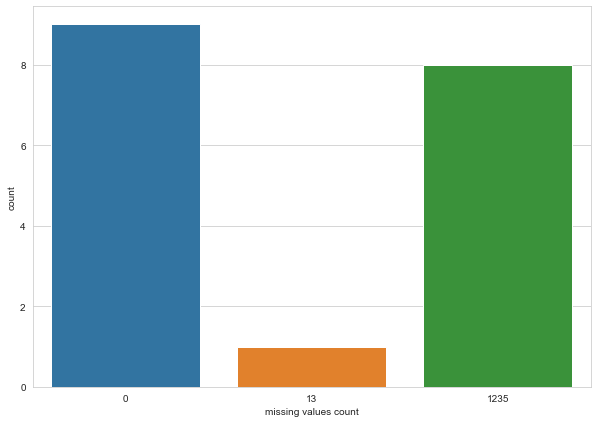

In [14]:
#distribution if missing values
plt.figure(figsize=(10,7))

sns.countplot(x=train.isna().sum(),data=train)
plt.xlabel('missing values count')

plt.show()

In [15]:
#imputation using the mode method
def mode(data,columns):
    for col in columns:
        mode = data[col].mode()
        if mode.empty:

    
            data = data[col].fillna(data[col].mode(0),inplace=True)
        else:
            data[col].fillna(mode[0], inplace=True)
    return data

    

    
mode(train,train[['A','B','C','D','E','F','Z','Treated_with_drugs','Number_of_prev_cond']])


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [16]:
#checking missing values after imputation
train.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

<AxesSubplot:>

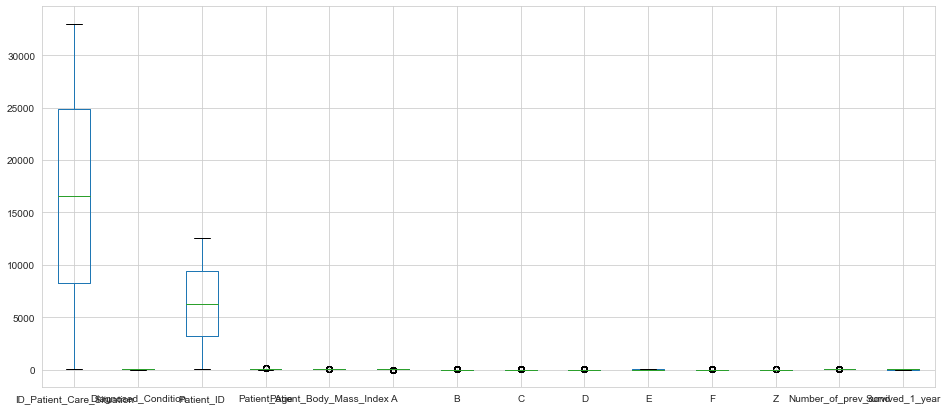

In [17]:
plt.figure(figsize=(16,7))
train.boxplot()

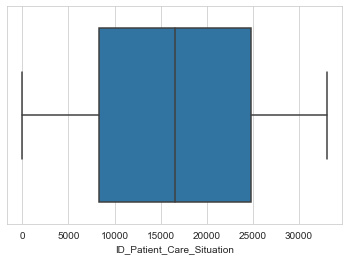

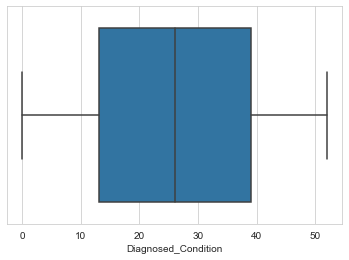

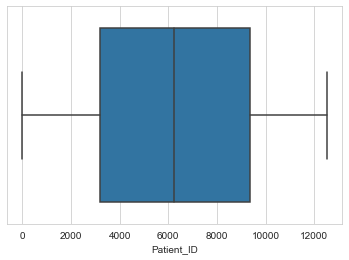

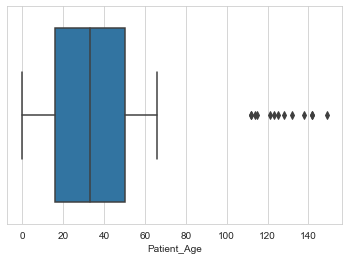

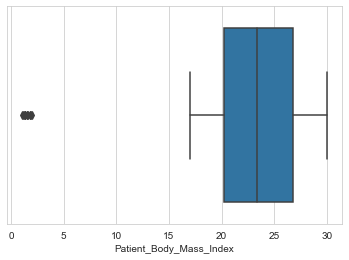

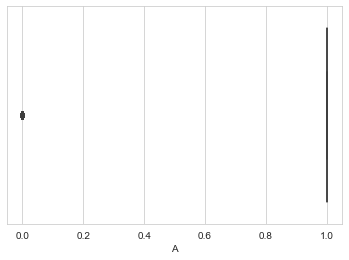

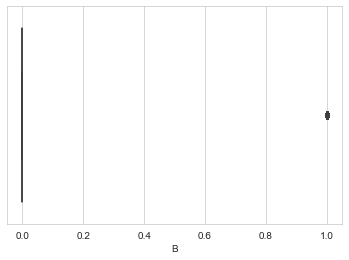

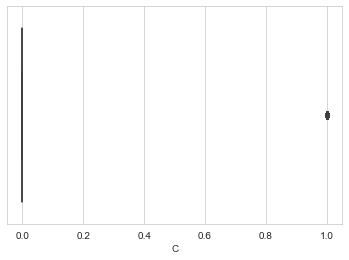

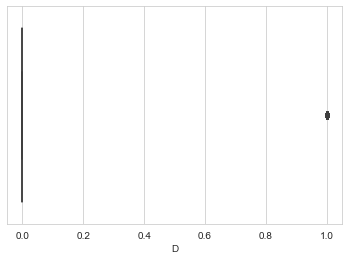

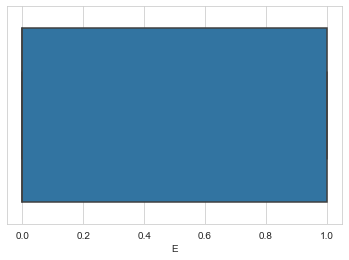

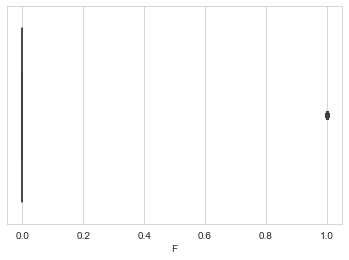

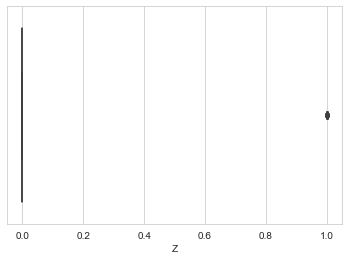

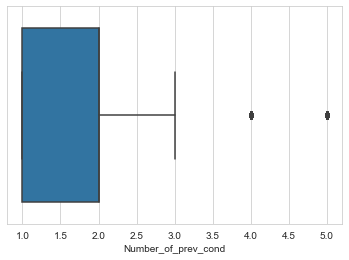

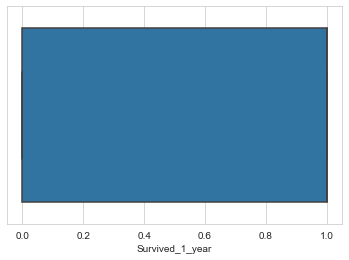

In [18]:
def boxplot(data,columns):
    
        for column in columns:
            if data[column].dtype != 'object':
            
        
                plt.figure()
                sns.boxplot(data=data,x=column)
                plt.show()
        
        
boxplot(train, [x for x in train.columns if train[x].dtype != 'object'] )

### the above boxplots shows that the columns patient_age and body mass index contain outliers as there ages above 110 and body mass indices below 5 that may portray sickness thus will not be counted as an outlier

In [19]:
#treating the patient age outliers

df = train[train['Patient_Age'] < 100]
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [20]:
#checking for duplicates
duplicated = df.duplicated()
duplicated.nunique()

1

### From the above, no dupliactes were there as all of them were false

## EXPLORATORY DATA ANALYSIS

### we went to explore the data and understand the causes of death

In [21]:
#visualizsing the patients with low bmi using the low 10% quartile

low_bmi = df[df['Patient_Body_Mass_Index'] <df['Patient_Body_Mass_Index'].quantile(0.1)  ]
low_bmi

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
13,14658,44,971,DX5,23,17.039536,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
19,30258,42,3517,DX3,22,17.637541,YES,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,1
36,4869,28,6826,DX1,4,17.342624,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,28082,25,3782,DX4 DX5,15,17.104362,NO,URBAN,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
23034,23703,39,5551,DX1 DX3,7,17.602809,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
23041,5788,45,9309,DX6,61,17.207112,YES,RURAL,Stable,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0
23061,20620,18,8028,DX1,65,18.062645,NO,RURAL,Stable,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0


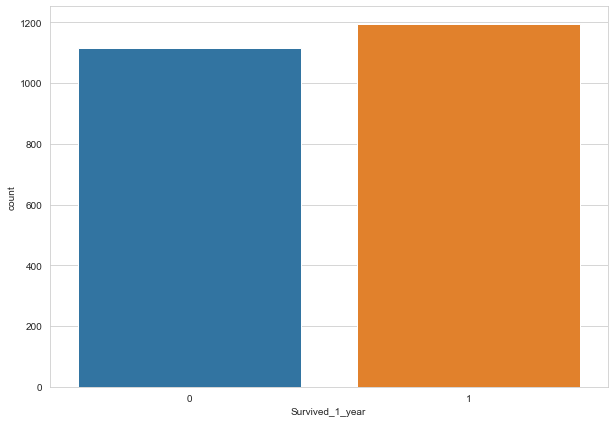

In [22]:
#checking survival
plt.figure(figsize=(10,7))
sns.countplot(data=low_bmi,x=low_bmi['Survived_1_year'])
plt.show()

### Most patients with bmi less than 18 survived


<AxesSubplot:xlabel='Patient_mental_condition', ylabel='count'>

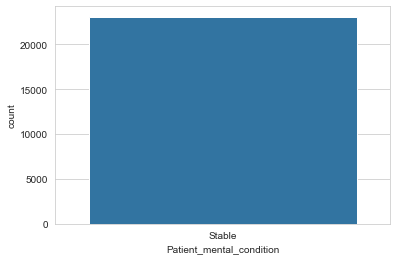

In [23]:
#mental condition
sns.countplot(data=df,x=df['Patient_mental_condition'])

### from the data all patients had a stable mental condition

<AxesSubplot:xlabel='Survived_1_year', ylabel='Number_of_prev_cond'>

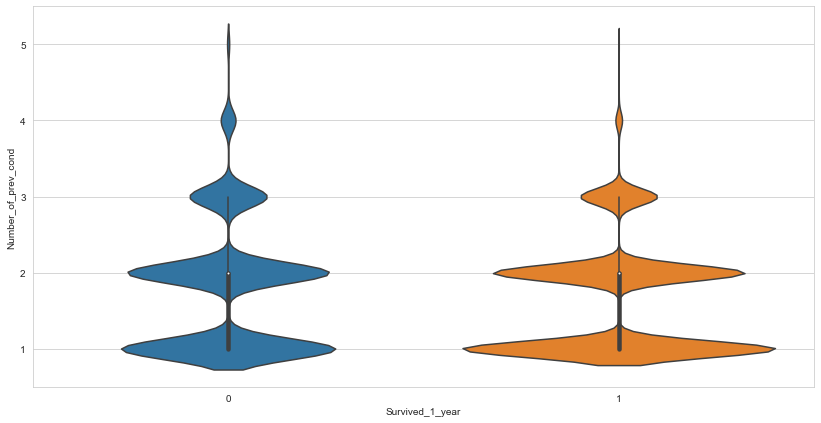

In [24]:
plt.figure(figsize=(14,7))
sns.violinplot(x='Survived_1_year', y='Number_of_prev_cond', data=df)

<AxesSubplot:xlabel='Number_of_prev_cond', ylabel='count'>

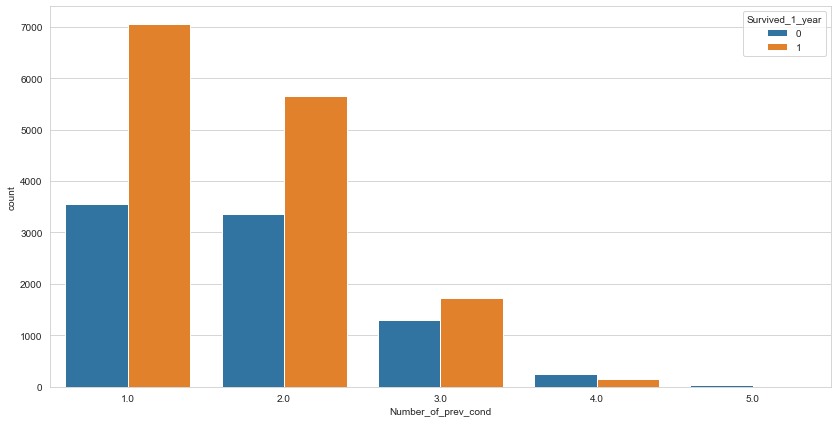

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(df['Number_of_prev_cond'],hue='Survived_1_year',data=df)

### the above two plots shows that patients with less number of previous conditions are likely to not sruvive while patients with more numbers of previous conditions are more likely to survive

<AxesSubplot:xlabel='Patient_Rural_Urban', ylabel='count'>

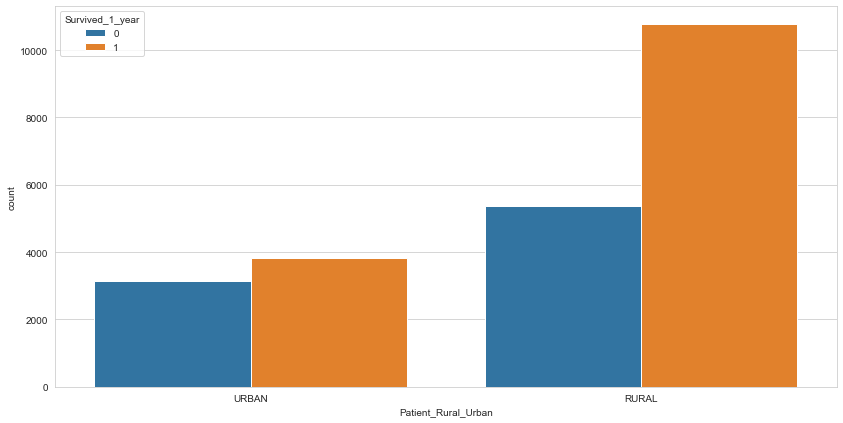

In [26]:
##rural and urban
plt.figure(figsize=(14,7))
sns.countplot(df['Patient_Rural_Urban'],hue=df['Survived_1_year'],data=df)

### most patients in rural areas did not survive as compared to urban

<AxesSubplot:xlabel='Patient_Smoker', ylabel='count'>

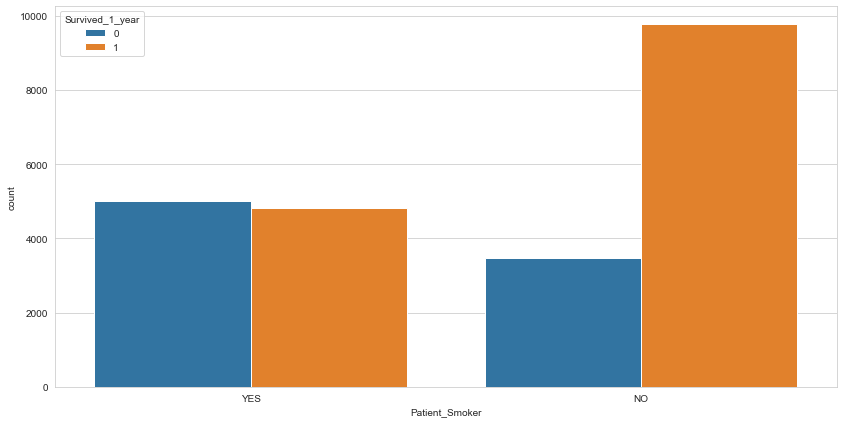

In [27]:
#patient smoker

plt.figure(figsize=(14,7))
sns.countplot(df['Patient_Smoker'],hue=df['Survived_1_year'],data=df)

### the above shows that smoking really affected survival where most patient that smoked did not survive and most patient that weren't smokers really survived

<AxesSubplot:xlabel='Diagnosed_Condition', ylabel='count'>

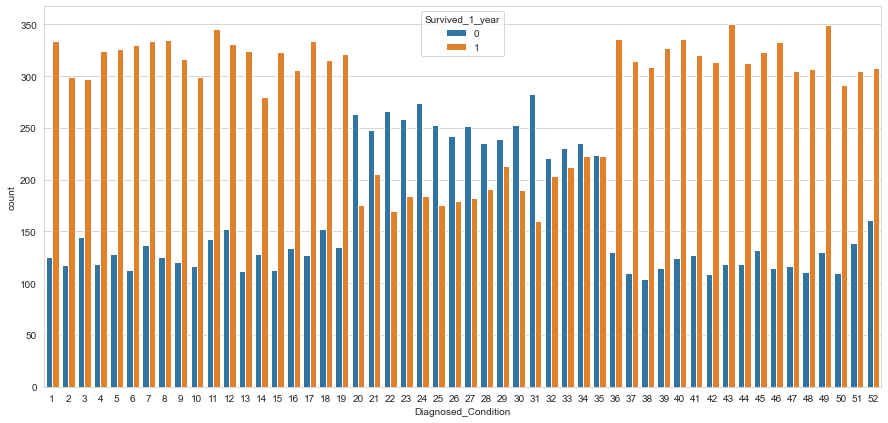

In [28]:
## Diagnosed_Condition
plt.figure(figsize=(15,7))
sns.countplot(df['Diagnosed_Condition'],hue=df['Survived_1_year'],data=df)

In [29]:
drugs = pd.DataFrame(df['Treated_with_drugs'].value_counts())
drugs = drugs.reset_index()
drugs = drugs.reset_index(drop=True)
drugs = drugs.rename(columns={'index':'drug type','Treated_with_drugs':'count'})
drugs

,drug type,count
0,DX6,8606
1,DX5,1909
2,DX2,1904
3,DX1,1835
4,DX3,1830
5,DX4,1792
6,DX3 DX4,448
7,DX1 DX2,448
8,DX1 DX3,424
9,DX4 DX5,423


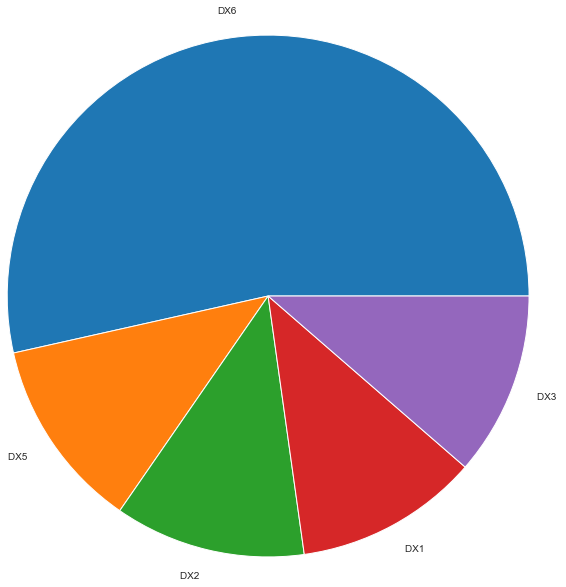

In [30]:
#pie chart showing distribution of drugs used for the first durgs that were given as one
plt.figure()
plt.pie(drugs['count'][0:5],radius=3,labels=drugs['drug type'][0:5])
plt.show()

### The most used drug was DX6

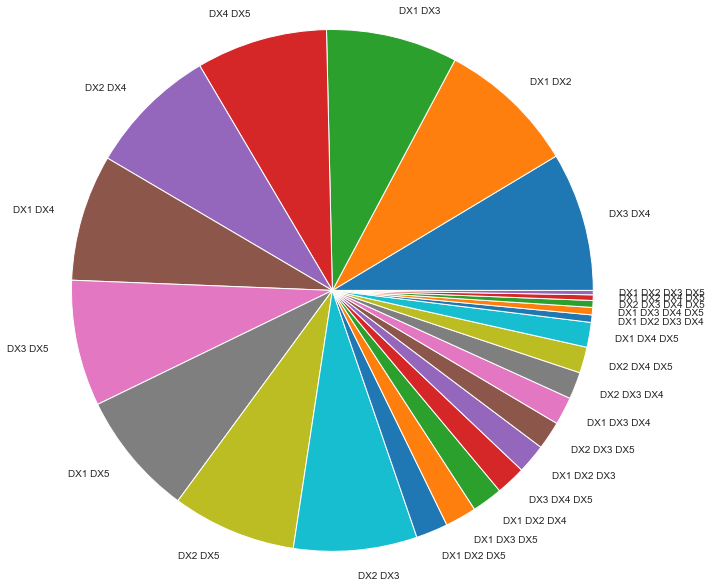

In [31]:
#pie chart showing distribution of drugs used for the first durgs that were given as multiple

plt.figure()
plt.pie(drugs['count'][6:31],radius=3,labels=drugs['drug type'][6:31])
plt.show()

<AxesSubplot:xlabel='Treated_with_drugs', ylabel='count'>

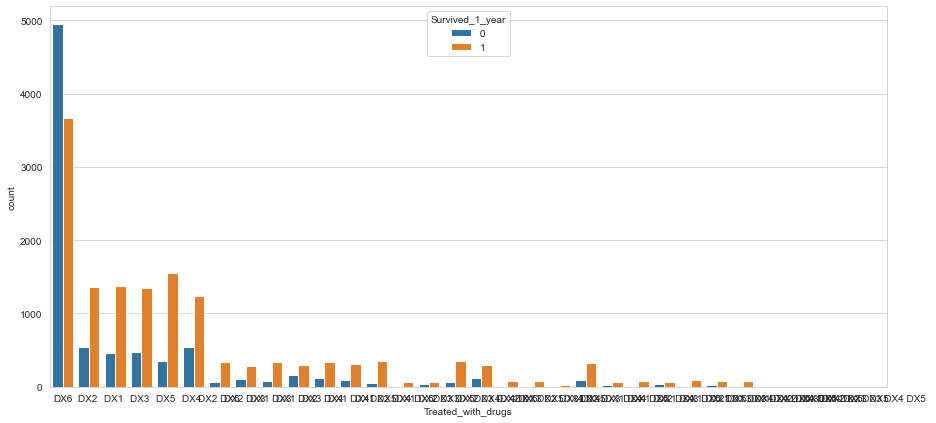

In [32]:
#identifying the most used drug
plt.figure(figsize=(15,7))
sns.countplot(df['Treated_with_drugs'],data=df,hue=df['Survived_1_year'])

In [33]:
#Label encoding for the categorical to numerical
le = LabelEncoder()


In [34]:
[x for x in df.columns if df[x].dtype == 'object']


['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition']

In [35]:
#converting the above
df['Treated_with_drugs'] = le.fit_transform(df['Treated_with_drugs']) 
df['Patient_Smoker'] = le.fit_transform(df['Patient_Smoker'])  
df['Patient_mental_condition'] = le.fit_transform(df['Patient_mental_condition'])  
df['Patient_Rural_Urban'] = le.fit_transform(df['Patient_Rural_Urban'])  

df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,16,36,22.945566,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,31,48,27.510027,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,0,5,19.130976,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,31,47,26.155120,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,21,14,18.643448,0,0,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,31,55,23.684585,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,31,63,27.500039,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,24,25,23.719125,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [36]:
#cretating instances of x and y columns
x = df.drop(columns=['Patient_ID','Patient_mental_condition','Survived_1_year'])
y = df['Survived_1_year']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=49,test_size=0.3)

Text(0.5, 1.0, 'Target column distribution(Survived_1_year)')

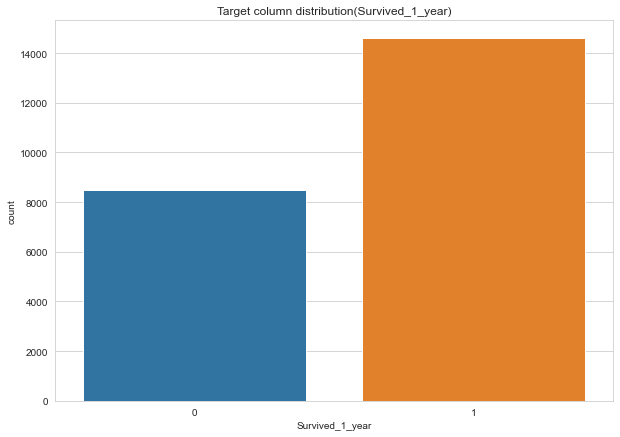

In [37]:
#balancing the target column
plt.figure(figsize=(10,7))
sns.countplot(df['Survived_1_year'],data=df)
plt.title('Target column distribution(Survived_1_year)')

In [38]:
#oversampling the 0 in the survived column
ros =  RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x_train,y_train)



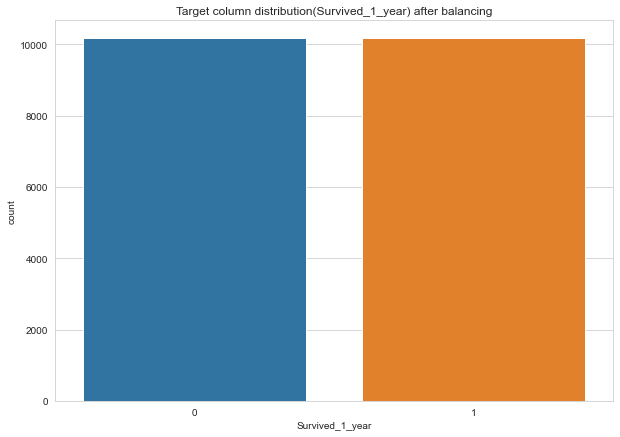

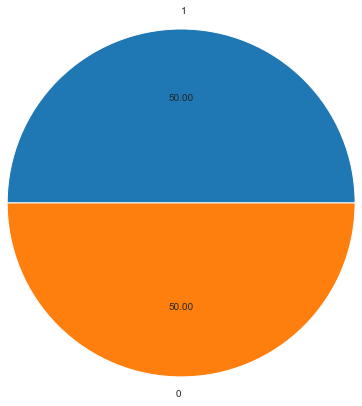

In [39]:
#after balancing
plt.figure(figsize=(10,7))
sns.countplot(y_resampled,data=df)
plt.title('Target column distribution(Survived_1_year) after balancing')
plt.show()

plt.figure()
y_resampled.value_counts().plot(kind='pie',autopct='%.2f',radius=2)
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=30)
rfc.fit(x_resampled,y_resampled)
rfc_pred = rfc.predict(x_test)

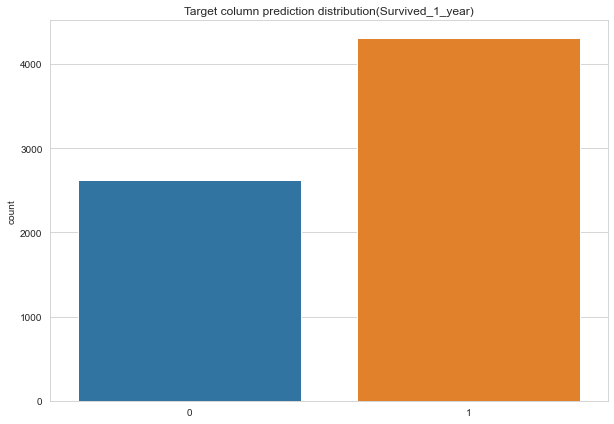

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(rfc_pred)
plt.title('Target column prediction distribution(Survived_1_year)')
plt.show()

### The model was able to predict that most patients would survive after one year

In [42]:
print("Accuracy>> ",round(100*accuracy_score(y_test,rfc_pred),2))

Accuracy>>  81.66


In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2504
           1       0.87      0.84      0.85      4422

    accuracy                           0.82      6926
   macro avg       0.80      0.81      0.80      6926
weighted avg       0.82      0.82      0.82      6926



## prediction using the given test data

In [44]:
test['Treated_with_drugs'] = le.fit_transform(test['Treated_with_drugs']) 
test['Patient_Smoker'] = le.fit_transform(test['Patient_Smoker'])  
test['Patient_mental_condition'] = le.fit_transform(test['Patient_mental_condition'])  
test['Patient_Rural_Urban'] = le.fit_transform(test['Patient_Rural_Urban'])  
test





,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,24,16,29.443894,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,31,24,26.836321,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,29,63,25.523280,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,31,42,27.171155,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,24,50,25.556192,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,31,28,29.106314,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,0,4,20.616673,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,11,20,24.727357,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,28,33,17.517426,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


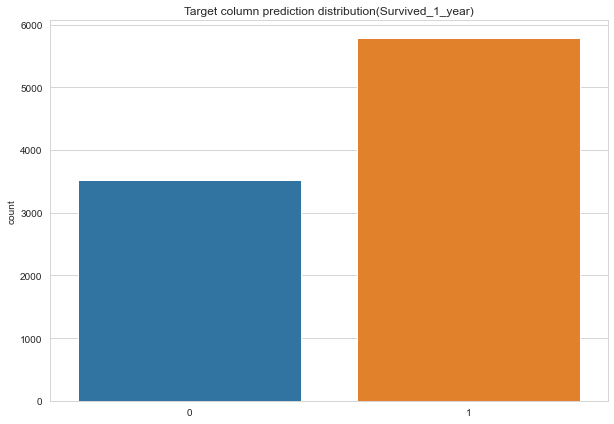

In [45]:
test = test.drop(columns=['Patient_ID','Patient_mental_condition'])
test_pred = rfc.predict(test)
plt.figure(figsize=(10,7))
sns.countplot(test_pred)
plt.title('Target column prediction distribution(Survived_1_year)')
plt.show()

In [46]:
test_pred =  pd.DataFrame(test_pred,columns=['prediction'])
submission_file =(test_pred.to_csv('SUBMISSION.csv',index=False))